# Name : Krishnakumar Mandal
# Rollno : 41
## Expt.-3: Linear Regression: Parameter Estimation using OLS, MLE, and Gradient Descent.

In [109]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [110]:
x=np.array([1,2,3]).reshape(-1,1)
y=np.array([2,3,5])

In [111]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [112]:
a=np.array([1,2,3])
a

array([1, 2, 3])

In [113]:
a.shape

(3,)

In [114]:
x.shape

(3, 1)

In [115]:
w=model.coef_[0]
b=model.intercept_
print(f"model weights : {w}")
print(f"model bias : {b}")

model weights : 1.4999999999999993
model bias : 0.3333333333333348


In [116]:
y_pred = model.predict(x)
print("\n predictions for training data :")
for xi , yi , ypi in zip(x.flatten(),y,y_pred):
  print(f" x={xi} , actual sales = {yi} , predicted sales = {ypi}")

mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(f"mean squared error : {mse}")
print(f"r2 score : {r2}")


 predictions for training data :
 x=1 , actual sales = 2 , predicted sales = 1.8333333333333341
 x=2 , actual sales = 3 , predicted sales = 3.3333333333333335
 x=3 , actual sales = 5 , predicted sales = 4.833333333333333
mean squared error : 0.05555555555555553
r2 score : 0.9642857142857143


In [117]:
xr=np.array([10,20,30,50]).reshape(-1,1)
yr=np.array([12,21,29,48])
model2=LinearRegression()
model2.fit(xr,yr)

LinearRegression()

In [118]:
w2=model2.coef_[0]
b2=model2.intercept_
print(f"model weights : {w2}")
print(f"model bias : {b2}")

model weights : 0.8971428571428574
model bias : 2.828571428571422


In [119]:
yrp=model2.predict(xr)
yrp

array([11.8       , 20.77142857, 29.74285714, 47.68571429])

# MLE

In [120]:
from scipy.optimize import minimize

In [121]:
def nef_log_likelihood(params):
  w,b=params
  sigma2=1
  y_pred=w*x+b
  nll = 0.5*np.sum((y-y_pred)**2 / sigma2**2)
  return nll

In [122]:
initial_guess=[0,0]
result=minimize(nef_log_likelihood,initial_guess)
w_mle,b_mle=result.x

In [123]:
print(f"weights = {w_mle},bias = {b_mle}")

weights = -8.3681841778443e-08,bias = 3.3333335569014952


In [124]:
y_pred_mle=w_mle*x + b_mle

In [125]:
for xi,yi,ypi in zip(x.flatten(),y,y_pred_mle):
  print(f"x={xi},actual sales={yi},predicted sales={ypi}")

x=1,actual sales=2,predicted sales=[3.33333347]
x=2,actual sales=3,predicted sales=[3.33333339]
x=3,actual sales=5,predicted sales=[3.33333331]


# Gradient Descent

In [126]:
w,b=0,0
alpha=0.0001
n_iter=1000
n=len(x)

In [127]:
for i in range(n_iter):
  y_pred=w*x.flatten()+b
  dw=-(2/n)*np.sum(x.flatten()*(y-y_pred))
  db=-(2/n)*np.sum(y-y_pred)
  w = w - alpha*dw
  b = b- alpha*db

print(f"slope : {w} , bias : {b}")

slope : 0.9277932204091286 , bias : 0.4003820339618283


In [128]:
y_pred = w*x + b
print("\n predictions for training data :")
for xi , yi , ypi in zip(x.flatten(),y,y_pred):
  print(f" x={xi} , actual sales = {yi} , predicted sales = {ypi}")

mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(f"mean squared error : {mse}")
print(f"r2 score : {r2}")


 predictions for training data :
 x=1 , actual sales = 2 , predicted sales = [1.32817525]
 x=2 , actual sales = 3 , predicted sales = [2.25596847]
 x=3 , actual sales = 5 , predicted sales = [3.1837617]
mean squared error : 1.4345509930741855
r2 score : 0.07778864730945201


# GD with parameter slope

In [129]:
import matplotlib.pyplot as plt

def loss(w1):
  w0 = np.mean(y) - w1* np.mean(x)
  y_pred = w0 + w1*x
  return np.mean((y - y_pred)**2)

def gradient(w1):
  w0 = np.mean(y) - w1* np.mean(x)
  y_pred = w0 + w1*x
  dw1 = -2*np.sum((y - y_pred)*x) #/len(x)
  return dw1

ir=0.1
w=4
iterations=15


w1_values=[]
loss_values=[]

for i in range(iterations):
  w1_values.append(w)
  loss_values.append(loss(w))
  grad=gradient(w)
  w=w-ir*grad

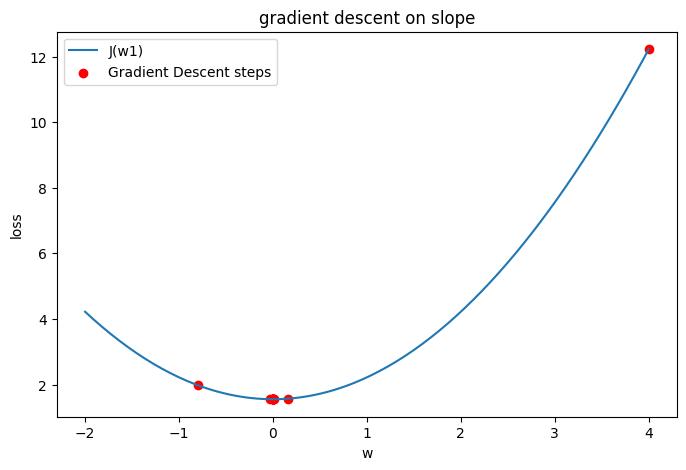

In [130]:
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8,5))
plt.plot(w_space, loss_space, label="J(w1)")
plt.scatter(w1_values, loss_values, color="red", label="Gradient Descent steps")
plt.legend()
plt.xlabel('w')
plt.ylabel('loss')
plt.title("gradient descent on slope")
plt.show()